In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten
from keras.models import Model

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [10]:
X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

In [11]:
ohe = OneHotEncoder(categories="auto")

In [12]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [14]:
X[0].shape

(28, 28, 1)

In [18]:
in_layer = Input(shape=[28, 28, 1])
conv_1 = Conv2D(32, (3, 3), activation="relu")(in_layer)
pool_1 = MaxPool2D()(conv_1)
conv_2 = Conv2D(64, (3, 3), activation="relu")(pool_1)
pool_2 = MaxPool2D()(conv_2)
conv_3 = Conv2D(128, (3, 3), activation="relu")(pool_2)
pool_3 = MaxPool2D()(conv_3)
flatten = Flatten()(pool_3)
dense_1 = Dense(200, activation="tanh")(flatten)
dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(50, activation="tanh")(drop)
out = Dense(10, activation="softmax")(dense_3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model = Model(inputs=[in_layer], outputs=[out])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
__________

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [22]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5360/5360 [==============================] - 7s 1ms/step - loss: 1.7085 - acc: 0.4599
Epoch 2/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.7782 - acc: 0.8116
Epoch 3/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.4606 - acc: 0.8892
Epoch 4/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.3265 - acc: 0.9168
Epoch 5/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.2340 - acc: 0.9451
Epoch 6/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.1825 - acc: 0.9528
Epoch 7/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.1654 - acc: 0.9556
Epoch 8/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.1416 - acc: 0.9631
Epoch 9/10
5360/5360 [==============================] - 5s 1ms/step - loss: 0.1310 - acc: 0.9675
Epoch 10/10
5360/5360 [==============================] - 6s 1ms/step - loss: 0.

In [23]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 469us/step


[0.13873308743491317, 0.9602272727272727]

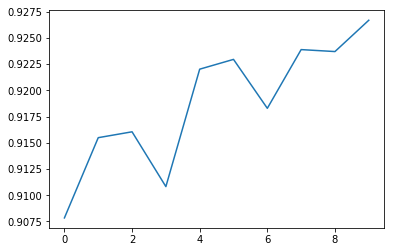

In [95]:
plt.plot(hist.history["acc"])

In [96]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [97]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [98]:
m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 152us/step


[0.30848723076509704, 0.9090909090909091]

In [99]:
!push "l 14"

[master 2a038f2] l 14
 1 file changed, 151 insertions(+), 4 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 7.85 KiB | 7.85 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/coding-blocks-archives/ML-Noida-2019-June-Two.git
   b14b699..2a038f2  master -> master


In [26]:
import cv2

array([[7, 6, 0, 1, 9, 5, 4, 8, 3, 2]])

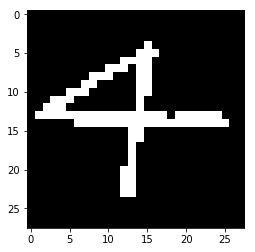

In [38]:
img = cv2.imread("../datasets/nums/four.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
invert = (small < 100).astype(int) * 255
plt.imshow(invert, cmap="gray")
np.argsort(model.predict(np.array([invert.reshape(28, 28, 1)])), axis=1)

array([[0, 6, 9, 7, 4, 5, 1, 8, 2, 3]])

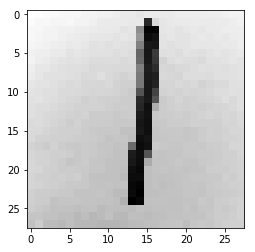

In [17]:
MaxPool2D?

In [ ]:
! push 